# PCA

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set_style('whitegrid')

matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

### 2016년 건강검진 데이터를 사용하겠습니다.

키가 크고 허리둘레가 큰 사람은 어떤 사람일까요?

덩치가 큰 사람이라고 표현할 수 있습니다.

키와 허리둘레라는 측정 가능한 데이터로 덩치라는 측정 불가능한 잠재 요소를 형성하는 것입니다. 

데이터로 이를 구현해보겠습니다.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/TaewoongKong/code_sharing/master/2016%E1%84%82%E1%85%A7%E1%86%AB_%E1%84%80%E1%85%A5%E1%86%AB%E1%84%80%E1%85%A1%E1%86%BC%E1%84%80%E1%85%A5%E1%86%B7%E1%84%8C%E1%85%B5%E1%86%AB_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.csv")
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2016,465969,1,8,41,170.0,70.0,74.0,0.7,0.7,...,96.0,3.0,NaN,1,NaN,NaN,NaN,NaN,2.0,20171219
1,2016,565871,1,10,41,160.0,60.0,81.0,1.2,1.0,...,14.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
2,2016,115718,2,11,11,160.0,55.0,71.0,1.0,1.0,...,20.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219
3,2016,767524,1,6,28,180.0,70.0,79.0,1.0,0.9,...,16.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,20171219
4,2016,482178,2,9,11,160.0,60.0,85.0,0.8,1.2,...,13.0,1.0,NaN,1,NaN,NaN,NaN,NaN,0.0,20171219


### 위 데이터에서 성별, 신장, 성별코드를 사용하겠습니다.

In [ ]:
df = df[['허리둘레', '신장(5Cm단위)','성별코드']]
df.columns = ['waist', 'height', 'sex']

### 남녀 구분을 위해 남성 데이터프레임, 여성 데이터프레임을 생성하겠습니다.

In [ ]:
df_man = df.loc[df['sex'] == 1]
df_woman = df.loc[df['sex'] == 2]

### 분포가 어떤지 시각화 해보겠습니다.

x 축에는 허리둘레, y축에는 키를 넣었습니다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. 

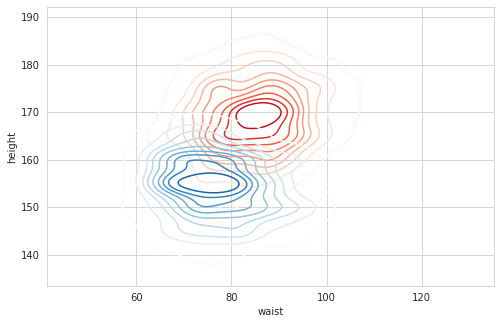

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

ax = sns.kdeplot(df_man.waist, df_man.height, cmap="Reds", shade=False, shade_lowest=False, cbar=False)
ax = sns.kdeplot(df_woman.waist, df_woman.height, cmap="Blues", shade=False, shade_lowest=False)

빨간색은 키가 큰 편이고 허리둘레도 파란색 분포에 비해 높은 편입니다.

덩치가 상대적으로 큰 부분이라 생각하니 남성일 것이라 예상됩니다.

이제 PCA 차원축소를 통해 덩치라는 하나의 값으로 변환한 뒤 성별 간의 비교를 해보겠습니다.

### 우선 허리둘레와 키 값에 대한 정규화를 먼저 진행하겠습니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df[['waist', 'height']])

### PCA 모델을 만들겠습니다.

n_components는 1로 설정합니다.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

### fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환하겠습니다.

In [ ]:
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
print(df_pca.shape)
df_pca

(1000, 1)


array([[ 1.07885176e-01],
       [-1.30565446e-01],
       [-8.67299003e-01],
       [ 1.23041607e+00],
       [ 1.64127976e-01],
       [-1.63017839e+00],
       [ 6.32313944e-01],
       [-1.10574963e+00],
       [-1.11446490e+00],
       [ 3.85148043e-01],
       [-1.62146312e+00],
       [-9.32257081e-01],
       [-8.76014281e-01],
       [ 6.97272021e-01],
       [ 6.14883388e-01],
       [-2.07221853e+00],
       [ 6.97272021e-01],
       [ 1.64127976e-01],
       [-1.30933914e+00],
       [-1.47411640e+00],
       [-1.30933914e+00],
       [-6.56073687e-02],
       [-9.40972358e-01],
       [-3.60300791e-01],
       [-2.77912158e-01],
       [ 1.72843254e-01],
       [ 8.53334011e-01],
       [ 6.79841466e-01],
       [-2.06350325e+00],
       [-2.04238802e-01],
       [ 1.71126844e+00],
       [ 7.53514821e-01],
       [-1.16199243e+00],
       [ 3.67717487e-01],
       [ 1.81108763e+00],
       [-4.51404703e-01],
       [-6.37563658e-01],
       [-1.26181161e+00],
       [-1.2

1000명의 덩치 값이 형성된 것을 확인할 수 있습니다.

### 시각화를 위해, 덩치값 옆에 성별 코드(타겟 레이블 개념)를 붙여줍니다.

In [ ]:
df_pca_component = pd.DataFrame(df_pca,columns=['pca_component'])
df_pca_component['target'] = df.sex

### 남성의 덩치 데이터와 여성의 덩치 데이터를 시각화하여 비교하겠습니다.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


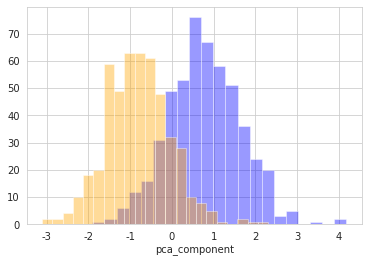

In [ ]:
sns.distplot(df_pca_component.loc[df_pca_component['target'] == 1, 'pca_component'],
             hist=True,
             color="blue",
             kde=False,
             label = 'man')
sns.distplot(df_pca_component.loc[df_pca_component['target'] == 2, 'pca_component'],
             hist=True,
             color="orange",
             kde=False,
             label = 'woman')

높은 pca_component 즉, 높은 덩치값이 많이 분포되어 있는 것은 남성으로 나타남을 알 수 있습니다.

# LDA

PCA와 비슷한 알고리즘인 LDA의 결과를 살펴보겠습니다.

### LDA의 모델을 n_components=1로 만들겠습니다.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

### lda는 fit 호출 시 target 값을 입력해야 합니다.

In [ ]:
lda.fit(df_scaled, df.sex)
df_lda = lda.transform(df_scaled)

### lda로 생성된 component 값 옆에 성별 데이터를 붙여주겠습니다.

In [ ]:
df_lda_component = pd.DataFrame(df_lda,columns=['lda_component'])
df_lda_component['target'] = df.sex

### 남성의 덩치 데이터와 여성의 component 데이터를 시각화하여 비교하겠습니다.

pca의 그래프와 lda의 그래프를 비교하겠습니다.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


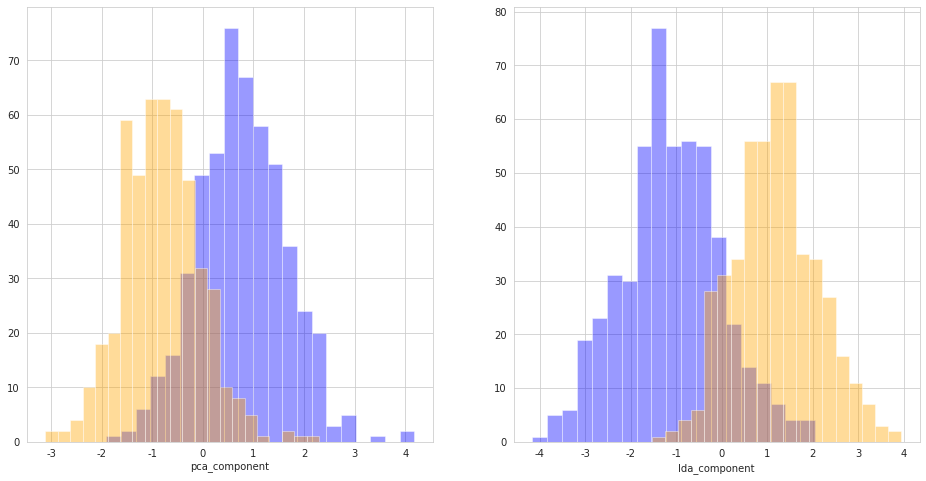

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=2 , nrows=1)

sns.distplot(df_pca_component.loc[df_pca_component['target'] == 1, 'pca_component'], hist=True, kde=False, color="blue", label = 'man', ax=axs[0])
sns.distplot(df_pca_component.loc[df_pca_component['target'] == 2, 'pca_component'], hist=True, kde=False, color="orange", label = 'woman', ax=axs[0])


sns.distplot(df_lda_component.loc[df_lda_component['target'] == 1, 'lda_component'], hist=True, kde=False, color="blue", label = 'man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 2, 'lda_component'], hist=True, kde=False, color="orange", label = 'woman', ax=axs[1])

PCA에 비해 LDA가 깔끔하게 분류된 것을 알 수 있습니다.

그런데, 파란색(남성)과 주황색(여성)의 위치가 바뀐 것을 알 수 있습니다. 

이는 잠재요소를 만들 축을 설정하는 기법에 차이가 있기 때문입니다. 

우선 키와 허리둘레는 양의 상관관계를 가질 것입니다.(키가 크면 허리둘레도 클 가능성이 큼)

이때 PCA는 데이터가 우상향 방향으로 변동성을 보이기에 축을 우상향으로 설정합니다.

반면에 LDA는 두 클래스를 분류해내야 하는 목적을 갖고, 둘이 떨어지도록 축을 좌상향으로 설정합니다.

이러한 이유로 PCA에서는 키와 허리둘레가 큰 사람의 component가 크다고 나오고, LDA에서는 허리둘레가 큰 사람의 component가 작다고 나옵니다. 

# t-SNE

t-SNE는 고차원 데이터를 축소하여 시각화 하는 용도로 주로 사용되는 알고리즘입니다.

### digits 데이터를 불러오겠습니다.

이 데이터 세트에는 0에서 9까지의 8x8 흑백 이미지 숫자 데이터셋입니다.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

### t-SNE 모델을 n_components=2로 만들겠습니다.

In [ ]:
from sklearn.manifold import TSNE

# t-sne 모델 생성
tsne = TSNE(n_components=2)

### TSNE에는 transform 메서드가 없으므로 대신 fit_transform을 사용합니다.

In [ ]:
digits_tsne = tsne.fit_transform(digits.data)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### 차원축소된 데이터를 통하여 시각화하겠습니다.

Text(0, 0.5, 't-SNE 특성 1')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


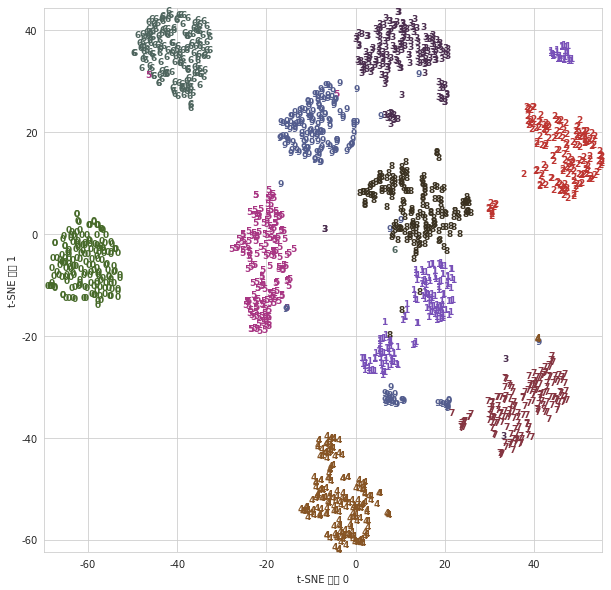

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight':'bold','size':9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")

# 군집화

### 먼저 digits 데이터세트를 로드합니다. 

클러스터링의 맥락에서 이미지의 손글씨 숫자가 동일하도록 이미지를 그룹화하려고 합니다.

return_X_y=True로 설정하여 X_digits, y_digits로 데이터를 분리하겠습니다.

In [ ]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

### 훈련 세트와 테스트 세트로 나눕니다.

특성 행렬을 표준화하겠습니다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

x_train, x_test = X_train/255.0, X_test/255.0

### 로지스틱 회귀 모델을 훈련하겠습니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

### 테스트 세트에서 평가합니다.

In [ ]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

기본 모델의 정확도는 96.89%입니다. 

이제 K-평균을 전처리 단계로 사용해 더 향상할 수 있는지 알아보겠습니다.

### 훈련 세트를 88개의 클러스터로 만들고 이미지를 이 클러스터까지 거리로 바꾼 다음 로지스틱 회귀 모델을 적용하는 파이프라인을 만듭니다.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=88, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=88, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

### 테스트세트에서 평가합니다.

In [ ]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9822222222222222

얼마나 오차가 감소했나요?

In [ ]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.42857142857142805

오차율을 43%나 줄였습니다! 

# GMM을 이용한 클러스터링 

## 1. 필요한 모듈 import

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from matplotlib.colors import LogNorm
%matplotlib inline

## 2. 데이터 생성

선형 데이터와 원형 데이터를 생성합니다. 

In [2]:
# 선형 데이터 생성 
X1, y1 = make_blobs(n_samples=1000, centers=((5, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.37, 0.95], [0.73, 0.6]]))
# 원형 데이터 생성 
X2, y2 = make_blobs(n_samples=500, centers=1, random_state=42)
# 데이터 합치기 
X = np.r_[X1, X2]
X[:, [0, 1]] = X[:, [1, 0]]

만들어진 데이터를 Train set과 Test set으로 나눈 후, data set의 분포를 확인합니다.  

In [3]:
# data set 분리 
X_train, X_test = train_test_split(X, test_size=0.2)

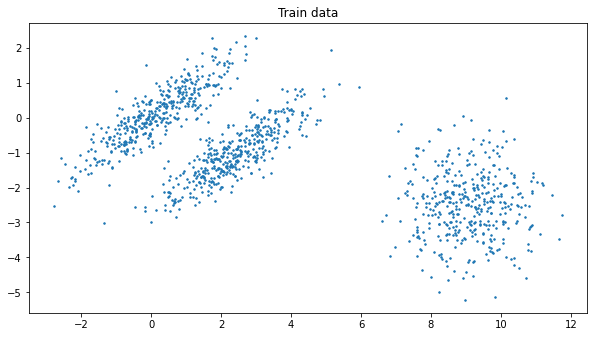

In [4]:
# 훈련 데이터 시각화 
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal')

plt.plot(X_train[:,0], X_train[:,1], '.', markersize=3)
plt.title('Train data')
plt.show()

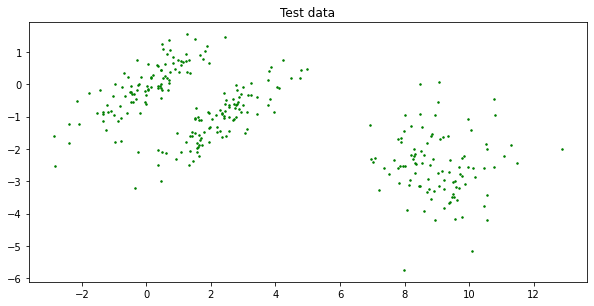

In [5]:
# 테스트 데이터 시각화 
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal')

plt.plot(X_test[:,0], X_test[:,1], '.', markersize=3, color='g')
plt.title('Test data')
plt.show()

## 3. GMM을 이용한 학습

우선 `Scikit-Learn`의 `GaussianMixture` 클래스를 활용하여 데이터를 학습하겠습니다. <br>
`GaussianMixture`의 `n_components`를 사용해서 군집의 개수는 3개로 지정하고, random_state는 0으로 지정해주세요.<br>
그 후 `fit`을 이용해서 학습을 진행해주세요! 

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_train)

GaussianMixture(n_components=3, random_state=0)

### 3-1. 군집 중심 확인

학습된 모델을 통해서 GMM의 군집 중심(Centroid)을 시각화 해봅시다!  <br>
군집 중심을 확인하기 위해서는 `GaussianMixture`에서 제공하는 `means_`함수를 사용해야 합니다. (GaussianMixture.means_: 군집 중심을 반환)


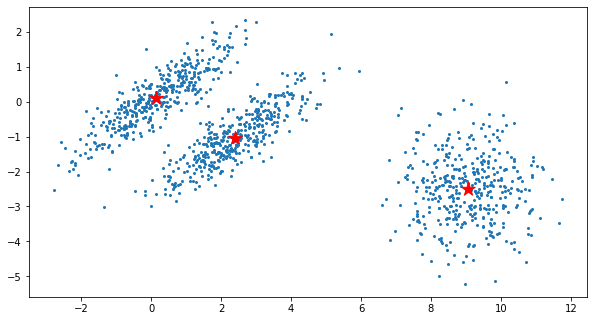

In [7]:
# 군집 중심 시각화 함수 
def visualization_c(gmm):
    # centroids 반환 
    centroids = gmm.means_
    plt.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 200, linewidths = 1, color = 'r', zorder = 10)

# figure 생성
plt.figure(figsize = (10,10))
plt.axes().set_aspect('equal')

# 함수 실행 
visualization_c(gmm)

# 시각화 
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

### 3-2. 밀도 등고선 시각화 
 

이제는 밀도 등고선을 확인해봅시다! <br>
`GaussianMixture`의 `score_samples(array)`함수를 통해서 각 샘플들의 log-likelihood 값을 구할 수 있습니다.

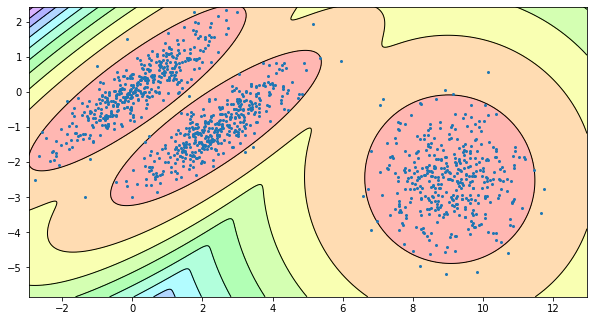

In [8]:
def visualization_contour(gmm):
    # 2차원 평면 공간 격자점 Array 생성
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    plane = np.c_[x.ravel(), y.ravel()]

    # log-likelihoods 기반의 밀도 구하기 
    densities = gmm.score_samples(plane)

    # 격자에 밀도 등고선 반영 
    densities = np.abs(densities.reshape(x.shape))
    cntr = plt.contourf(x, y, densities, levels=10, alpha=0.3, cmap='gist_rainbow')
    plt.contour(x, y, densities, levels=10, linewidths=1, colors='k')

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# 함수 실행 
visualization_contour(gmm)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

밀도 등고선을 통해서 특정 지점에 대한 cluster들의 확률을 확인할 수 있습니다. <br>
만약 비지도학습이라면, 각 cluster에 대해서 확률이 동일한 지점을 구하고 해당 지점을 기점으로 classification을 할 수 있을 것 같습니다.  

### 3-3. GMM의 covariance Matrix 분석 


학습된 GMM의 covariance matrix는 `GaussianMixture`의 `covariances_`함수를 통해서 알 수 있습니다. <br>
앞의 과정을 통해 나눠진 가우시안 분포들에 해당하는 covariance matrix를 구하여 샘플들의 분포를 예측할 수 있습니다. 

In [9]:
covariances = gmm.covariances_
print('Covariance matrix 1\n', covariances[0],
     '\n\nCovariance matrix 2\n', covariances[1],
      '\n\nCovariance matrix 3\n', covariances[2])

Covariance matrix 1
 [[1.25984023 0.83995436]
 [0.83995436 0.72928981]] 

Covariance matrix 2
 [[ 0.94094311 -0.01318262]
 [-0.01318262  0.923134  ]] 

Covariance matrix 3
 [[1.17236134 0.73290217]
 [0.73290217 0.63620378]]


## 4. GMM을 이용한 예측

### 4-1. 학습된 gmm을 통해서 클러스터 분류

이전 과정에서 학습시킨 gmm 객체를 통해서 X_test의 cluster를 예측해보고, 시각화 하겠습니다. 

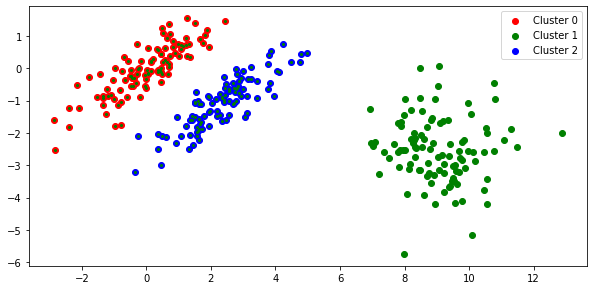

In [10]:
def classification(gmm):
    # 예측
    y = gmm.predict(X_test)

    # Cluster 분류 
    # Cluster 0으로 예측되는 경우 
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 0],
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 0],
                label = 'Cluster 0', marker='o', color = 'r')
    # Cluster 1으로 예측되는 경우 
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 1],
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 1],
                label = 'Cluster 1', marker='o', color = 'g')
    # Cluster 2으로 예측되는 경우 
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 2],
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 2],
                label = 'Cluster 2', marker='o', color = 'b')
    
# figure 생성 
plt.figure(figsize = (10,10))
plt.axes().set_aspect('equal')

# 실행 
classification(gmm)
plt.plot(X_test[:, 0], X_test[:, 1], '.g', markersize=4)
plt.legend()
plt.show()

### 4-2. 결정 경계 시각화

인접 클러스터들에 대해 동일한 확률을 갖는 지점들을 이어서 결정 경계를 시각화 할 수 있을 것 같습니다. <br>
결정 경계를 시각화 해보겠습니다! 

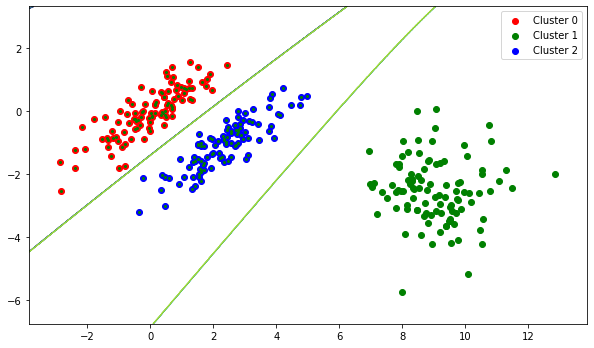

In [11]:
def decision_boundary(gmm):
    # 2차원 평면 공간 격자점 Array 생성
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    plane = np.c_[x.ravel(), y.ravel()]

    # 결정 경계 시각화
    Z = gmm.predict(plane)
    Z = Z.reshape(x.shape)
    plt.contour(x, y, Z, linewidths=1, linestyles='solid')

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# 위에서 진행한 분류 및 시각화
classification(gmm)
plt.plot(X_test[:, 0], X_test[:, 1], '.g', markersize=4)
plt.legend()

# 결정 경계 시각화
decision_boundary(gmm)
plt.show()

# 수고하셨습니다!